<a href="https://colab.research.google.com/github/Jake0925/DeepLearning/blob/master/Seaborn_heatmap_%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84%EB%B6%84%EC%84%9D(Correaltion).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from string import ascii_letters # 알파벳 a~z까지
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

In [38]:
# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))
d.head(2)

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z
0,-0.318854,-1.602981,-1.535218,-0.570401,-0.216728,0.254874,-0.149450,2.010783,-0.096784,0.422202,-0.225462,-0.637943,-0.016286,1.044217,-1.084880,-2.205925,-0.951219,0.832973,-1.000208,0.343463,1.546030,0.690081,-2.045853,0.334467,-0.641459,-0.222497
1,-1.230374,0.205848,0.821371,-0.493780,-1.408794,-1.216324,1.734299,-0.206790,-0.733189,0.774163,-0.777376,-0.414635,-1.145641,0.325040,0.000594,1.418588,-0.148826,-0.606270,-1.185801,0.455504,-0.837645,-0.146961,-0.682350,1.487670,-1.094711,-1.654707


In [39]:
corr = d.corr() # 행과열이 같은 알파벳이면 1이고 이를 기준으로 대각선방향으로 1값이 생성되면 1을 기준으로 대각선방향대칭으로 같은값을 갖는다
corr.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z
A,1.000000,-0.107401,-0.086468,0.000131,0.035047,0.004749,0.028226,0.000422,0.132100,0.057720,0.019025,0.119540,-0.146043,0.120121,0.001804,-0.041442,0.073645,-0.055396,-0.058241,-0.123823,0.096451,-0.015178,0.172725,0.003791,0.005531,-0.011534
B,-0.107401,1.000000,0.254632,0.061506,0.043581,-0.078019,0.069133,-0.211278,-0.011796,0.085277,-0.012235,-0.072379,0.079316,-0.011122,0.057197,0.200635,0.031315,0.100451,-0.103068,0.011187,-0.008536,-0.030730,-0.022978,-0.050483,-0.014468,0.078737
C,-0.086468,0.254632,1.000000,-0.033682,-0.127464,0.141223,0.164793,-0.188574,-0.230059,0.145777,-0.026024,0.092206,-0.000673,0.108226,-0.075359,0.223896,0.010497,0.051872,0.084793,0.167976,-0.043806,-0.057125,0.125580,-0.068426,-0.052764,0.094661
D,0.000131,0.061506,-0.033682,1.000000,0.086054,-0.153212,-0.000963,-0.017282,-0.109283,0.011056,0.008442,-0.105018,0.281956,0.020412,0.012707,0.087098,-0.136959,-0.061816,0.134112,0.081143,0.124706,0.194911,-0.016944,-0.116963,0.054315,0.014383
E,0.035047,0.043581,-0.127464,0.086054,1.000000,-0.007159,0.157224,-0.096254,0.043785,0.015117,-0.028174,0.070383,0.062128,-0.068501,0.032593,-0.216066,0.090499,0.041276,0.076138,0.027021,0.069976,-0.021745,0.104822,-0.047913,0.120465,0.080980


삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)

- ones_like - 배열의 크기와 동일하며 모든 원소의 값이 1인 배열을 생성할 수 있습니다
- np.triu - 위쪽삼각형
- np.tril - 아래쪽 삼각형


- https://blog.naver.com/kiddwannabe/221763497317


In [40]:
# mask = np.triu(np.ones_like(corr, dtype=bool))
mask = np.zeros_like(corr, dtype=np.bool) # corr와 같은크기의 배열에 모두 Zero값을 넣고 Bool로 표현
mask[np.triu_indices_from(mask)] = True   # 삼각형 위쪽 부분은 모두 True로 표현
mask[:,2]

array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [41]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

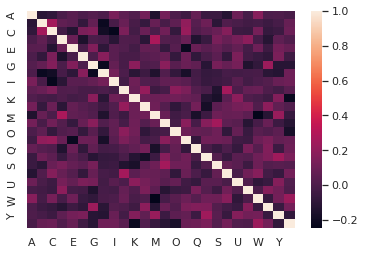

In [42]:
sns.heatmap(corr)

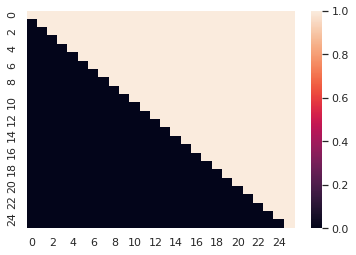

In [43]:
sns.heatmap(mask)

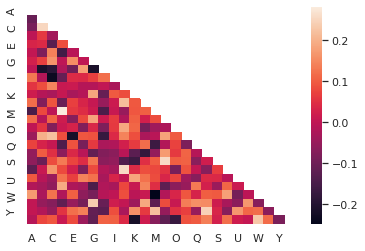

In [44]:
sns.heatmap(corr, mask = mask) # 대각성방향으로 대칭이어서 값이 중복되므로 보기편하게 한쪽만 표시되도록 마스크 사용

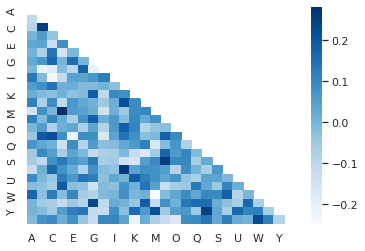

In [45]:
sns.heatmap(corr, mask = mask, cmap='Blues')

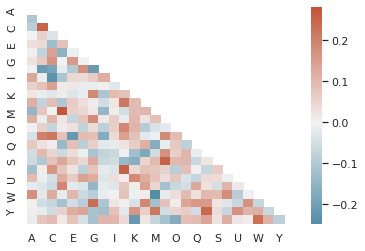

In [46]:
sns.heatmap(corr, mask = mask, cmap=cmap, center=0) # center=0을 통하여 0이상은 Red, 0이하는 Blue계열로 표시됨

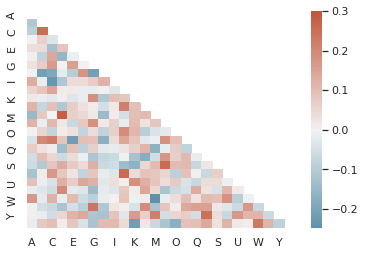

In [47]:
sns.heatmap(corr, mask = mask, cmap=cmap, center=0, vmax=.3) # vmax= 색상의 최고레벨값설정

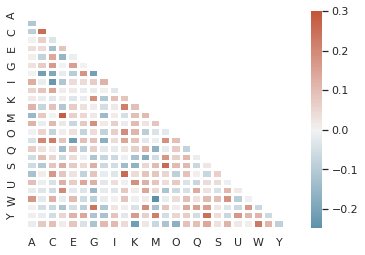

In [49]:
sns.heatmap(corr, mask = mask, cmap=cmap, center=0, vmax=.3, linewidth=2) # linewidth - 각 사각형별로 외곽에 라인을그려 간격처럼보이게한다

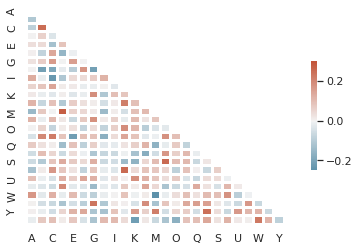

In [51]:
sns.heatmap(corr, mask = mask, cmap=cmap, center=0, vmax=.3, linewidth=2, cbar_kws={"shrink": .5}) # cbar_kws - 우측의 color bar 크기 변경

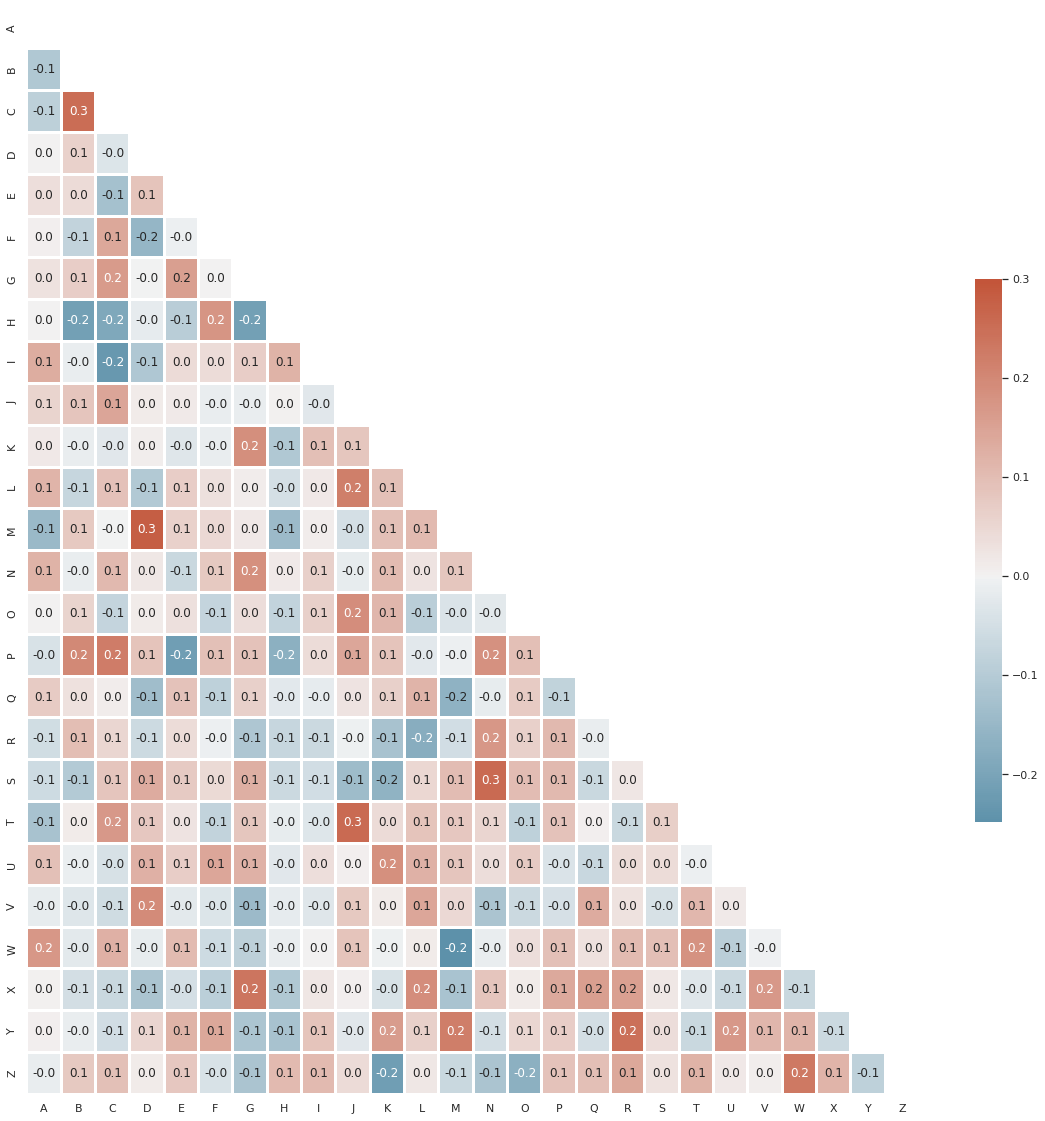

In [55]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask = mask, cmap=cmap, center=0, vmax=.3, linewidth=2, cbar_kws={"shrink": .5},
            annot = True, fmt='.1f') # annot - 값표시, fmt='.1f 소수점한자리까지만표시

In [57]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [61]:
c = mpg.corr()
c

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


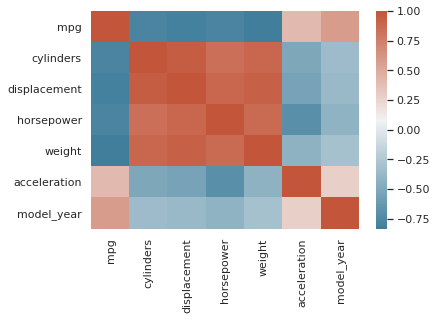

In [63]:
sns.heatmap(c, cmap=cmap)

In [66]:
mask2 = np.zeros_like(c, dtype=np.bool) # corr와 같은크기의 배열에 모두 Zero값을 넣고 Bool로 표현
mask2[np.triu_indices_from(mask2)] = True   # 삼각형 위쪽 부분은 모두 True로 표현
mask2

array([[ True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True],
       [False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False,  True]])

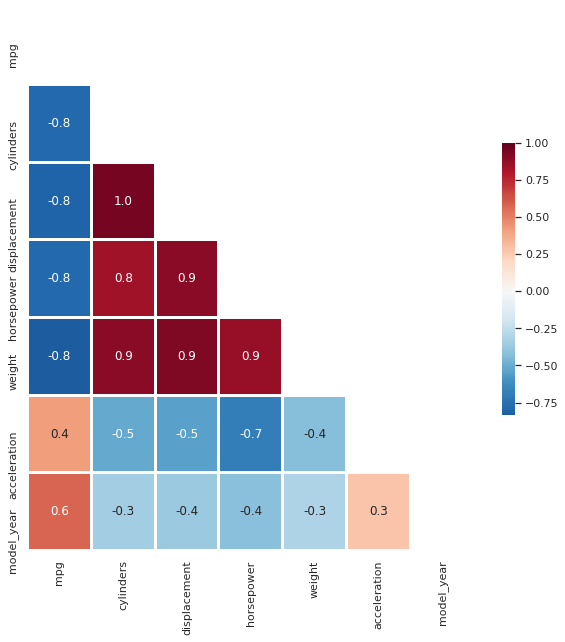

In [71]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(c, mask = mask2, cmap='RdBu_r', center=0, vmax=1, linewidth=2, cbar_kws={"shrink": .5},
            annot = True, fmt='.1f') # annot - 값표시, fmt='.1f 소수점한자리까지만표시